# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funcoes

# Importando Dados

In [19]:
erros_tot = pd.read_excel('../Output de dados/erros_viagens_totais.xlsx')
erros_tot.columns = ['error_type', 'ARIMA', 'MA', 'SEH', 'SES', 'HW']
erros_tot['type'] = 'totais'
erros_tot

,error_type,ARIMA,MA,SEH,SES,HW,type
0,RMSE,0.005001,0.005290,0.005502,0.005542,0.005461,totais
1,MAE,0.003873,0.004389,0.004037,0.004178,0.004047,totais


In [20]:
erros_seg = pd.read_excel('../Output de dados/erros_viagens_diaria.xlsx', sheet_name='segundas')
erros_ter = pd.read_excel('../Output de dados/erros_viagens_diaria.xlsx', sheet_name='tercas'  )
erros_qua = pd.read_excel('../Output de dados/erros_viagens_diaria.xlsx', sheet_name='quartas' )
erros_qui = pd.read_excel('../Output de dados/erros_viagens_diaria.xlsx', sheet_name='quintas' )
erros_sex = pd.read_excel('../Output de dados/erros_viagens_diaria.xlsx', sheet_name='sextas'  )

erros_seg.columns = ['error_type', 'ARIMA', 'MA', 'SEH', 'SES', 'HW']
erros_ter.columns = ['error_type', 'ARIMA', 'MA', 'SEH', 'SES', 'HW']
erros_qua.columns = ['error_type', 'ARIMA', 'MA', 'SEH', 'SES', 'HW']
erros_qui.columns = ['error_type', 'ARIMA', 'MA', 'SEH', 'SES', 'HW']
erros_sex.columns = ['error_type', 'ARIMA', 'MA', 'SEH', 'SES', 'HW']

erros_seg['type'] = 'segundas'
erros_ter['type'] = 'tercas'  
erros_qua['type'] = 'quartas' 
erros_qui['type'] = 'quintas' 
erros_sex['type'] = 'sextas'  


erros_ter

,error_type,ARIMA,MA,SEH,SES,HW,type
0,RMSE,0.030035,0.026260,25.949979,0.028310,0.026486,tercas
1,MAE,0.026278,0.022321,10.622523,0.024897,0.021443,tercas


In [21]:
erros_ods = pd.read_excel('../Output de dados/erros_viagens_ODS.xlsx')
erros_ods.columns = ['error_type', 'ARIMA', 'MA', 'SEH', 'SES', 'HW']
erros_ods['type'] = 'ods'

erros_ods

,error_type,ARIMA,MA,SEH,SES,HW,type
0,MAE,0.011115,0.010361,0.011079,0.011054,0.010848,ods
1,RMSE,0.034545,0.033243,0.034462,0.034627,0.035439,ods


# Desenvolvimento

In [22]:
erros = pd.concat([ erros_tot,
                    erros_seg,
                    erros_ter,
                    erros_qua,
                    erros_qui,
                    erros_sex,
                    erros_ods
                    ], axis = 0, ignore_index=True)
                    
erros

,error_type,ARIMA,MA,SEH,SES,HW,type
0,RMSE,0.005001,0.005290,0.005502,0.005542,0.005461,totais
1,MAE,0.003873,0.004389,0.004037,0.004178,0.004047,totais
2,RMSE,0.023852,0.020713,0.117544,0.020862,0.025510,segundas
3,MAE,0.018779,0.013729,0.065400,0.016625,0.018910,segundas
4,RMSE,0.030035,0.026260,25.949979,0.028310,0.026486,tercas
5,MAE,0.026278,0.022321,10.622523,0.024897,0.021443,tercas
6,RMSE,0.029473,0.028700,0.026968,0.028429,0.043039,quartas
7,MAE,0.026682,0.027555,0.024543,0.024747,0.036946,quartas
8,RMSE,0.019847,0.031403,0.027118,0.029013,0.026200,quintas
9,MAE,0.018634,0.029973,0.027003,0.025773,0.017508,quintas


In [49]:
erros.loc[erros['error_type'] == 'RMSE','ARIMA' ].values

array([0.00500098, 0.02385203, 0.03003512, 0.02947335, 0.01984682,
       0.02210589, 0.03454549])

In [43]:
erros.loc[erros['error_type'] == 'RMSE', 'type']

0       totais
2     segundas
4       tercas
6      quartas
8      quintas
10      sextas
13         ods
Name: type, dtype: object

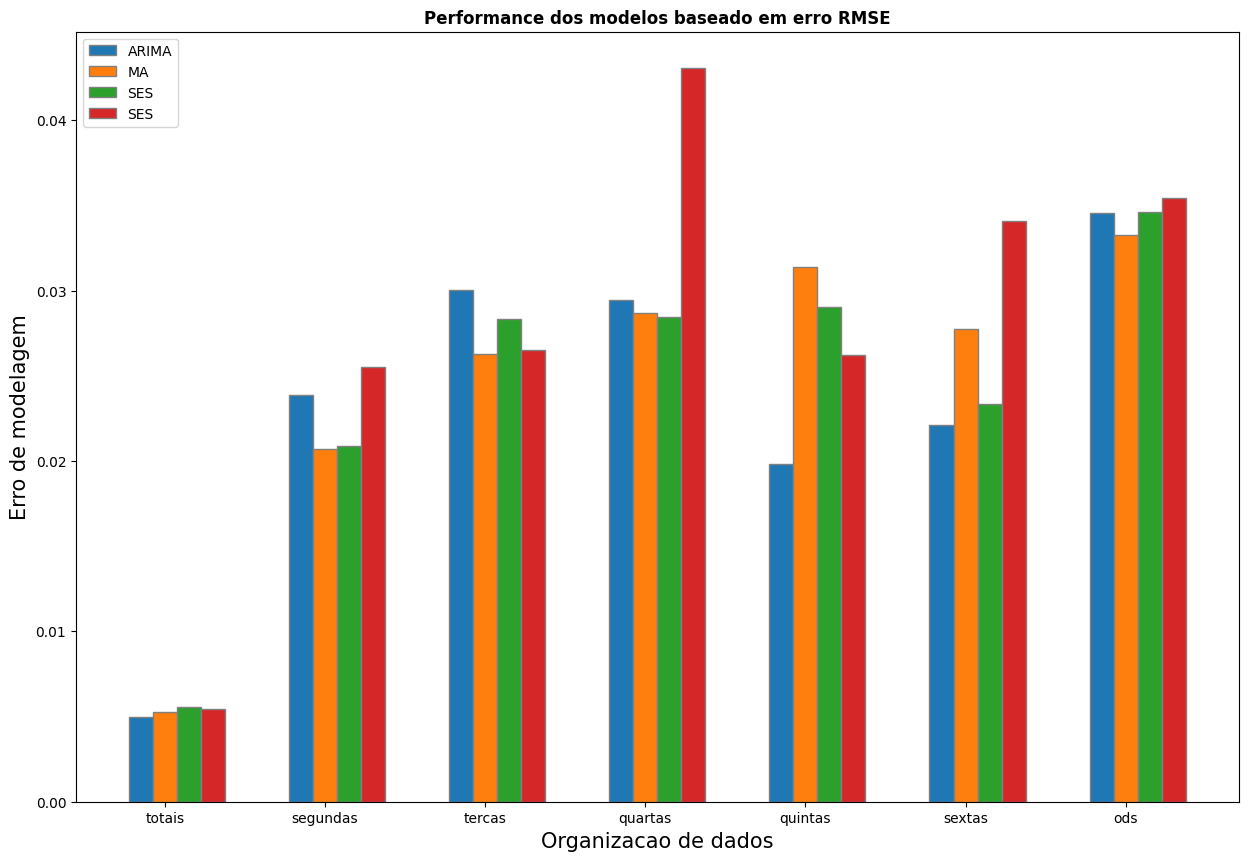

In [67]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(15,10))

# set height of bar
ARIMA 	= erros.loc[erros['error_type'] == 'RMSE','ARIMA' ].values
MA 		= erros.loc[erros['error_type'] == 'RMSE','MA'    ].values
SEH 	= erros.loc[erros['error_type'] == 'RMSE','SEH'   ].values
SES 	= erros.loc[erros['error_type'] == 'RMSE','SES'   ].values
HW 		= erros.loc[erros['error_type'] == 'RMSE','HW'    ].values

# Set position of bar on X axis
br1 = np.arange(len(ARIMA))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, ARIMA, width = barWidth,edgecolor ='grey', label ='ARIMA')
plt.bar(br2, MA, width = barWidth,edgecolor ='grey', label ='MA')
# plt.bar(br3, SEH, color ='b', width = barWidth,# 		edgecolor ='grey', label ='SEH')
plt.bar(br3, SES, width = barWidth,edgecolor ='grey', label ='SES')
plt.bar(br4, HW, width = barWidth,edgecolor ='grey', label ='SES')

# Adding Xticks
plt.xlabel('Organizacao de dados', fontsize = 15)
plt.ylabel('Erro de modelagem', fontsize = 15)

plt.title("Performance dos modelos baseado em erro RMSE", fontweight ='bold')
# ax.set_xlabel("Organizacao de dados")
# ax.set_ylabel("Erro de modelagem")

plt.xticks([r + barWidth for r in range(len(ARIMA))], erros.loc[erros['error_type'] == 'RMSE', 'type'].values)

plt.legend(loc= 'upper left')
plt.show()


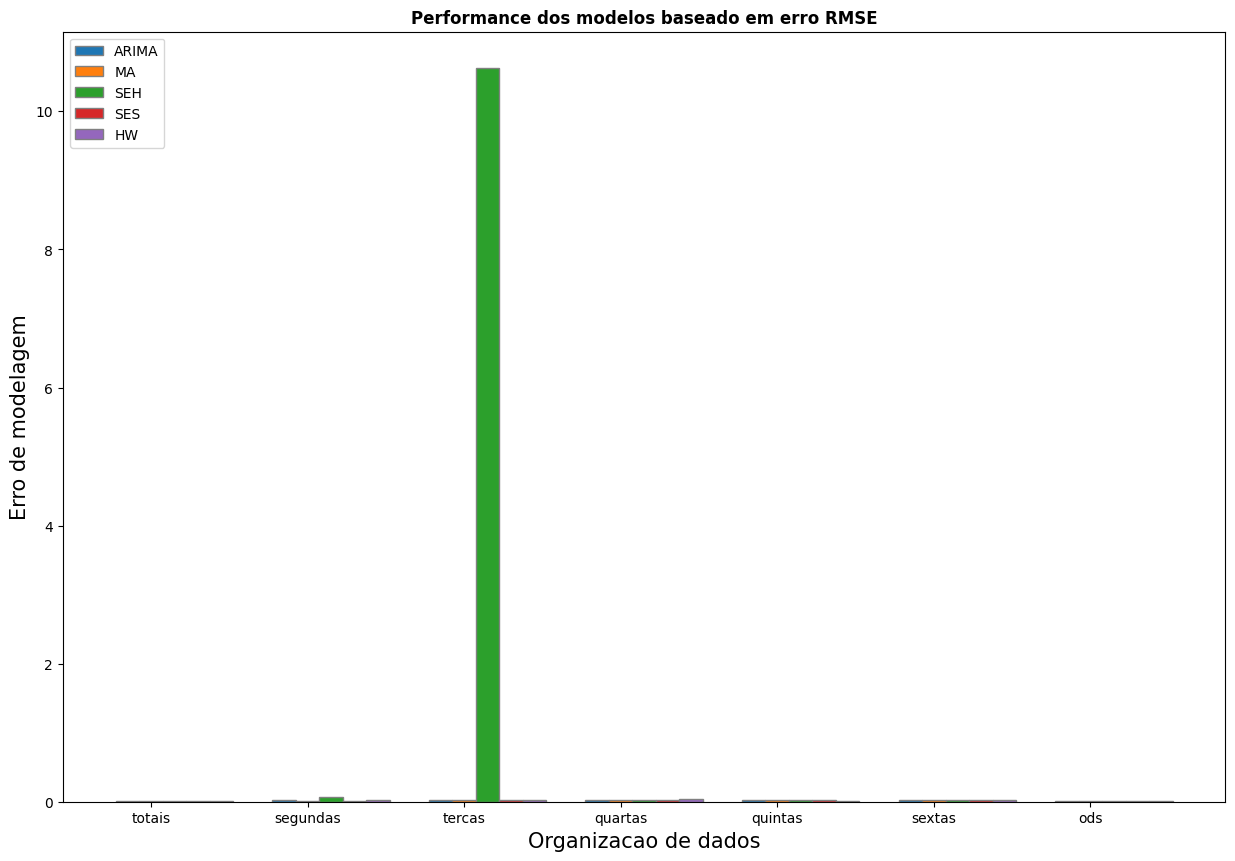

In [73]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(15,10))

# set height of bar
ARIMA 	= erros.loc[erros['error_type'] == 'MAE','ARIMA' ].values
MA 		= erros.loc[erros['error_type'] == 'MAE','MA'    ].values
SEH 	= erros.loc[erros['error_type'] == 'MAE','SEH'   ].values
SES 	= erros.loc[erros['error_type'] == 'MAE','SES'   ].values
HW 		= erros.loc[erros['error_type'] == 'MAE','HW'    ].values

# Set position of bar on X axis
br1 = np.arange(len(ARIMA))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, ARIMA, width = barWidth,edgecolor ='grey', label ='ARIMA')
plt.bar(br2, MA, width = barWidth,edgecolor ='grey', label ='MA')
plt.bar(br3, SEH, width = barWidth,edgecolor ='grey', label ='SEH')
plt.bar(br4, SES, width = barWidth,edgecolor ='grey', label ='SES')
plt.bar(br5, HW, width = barWidth,edgecolor ='grey', label ='HW')

# Adding Xticks
plt.xlabel('Organizacao de dados', fontsize = 15)
plt.ylabel('Erro de modelagem', fontsize = 15)

plt.title("Performance dos modelos baseado em erro RMSE", fontweight ='bold')


plt.xticks([r + barWidth for r in range(len(ARIMA))], erros.loc[erros['error_type'] == 'MAE', 'type'].values)

plt.legend(loc= 'upper left')
plt.show()


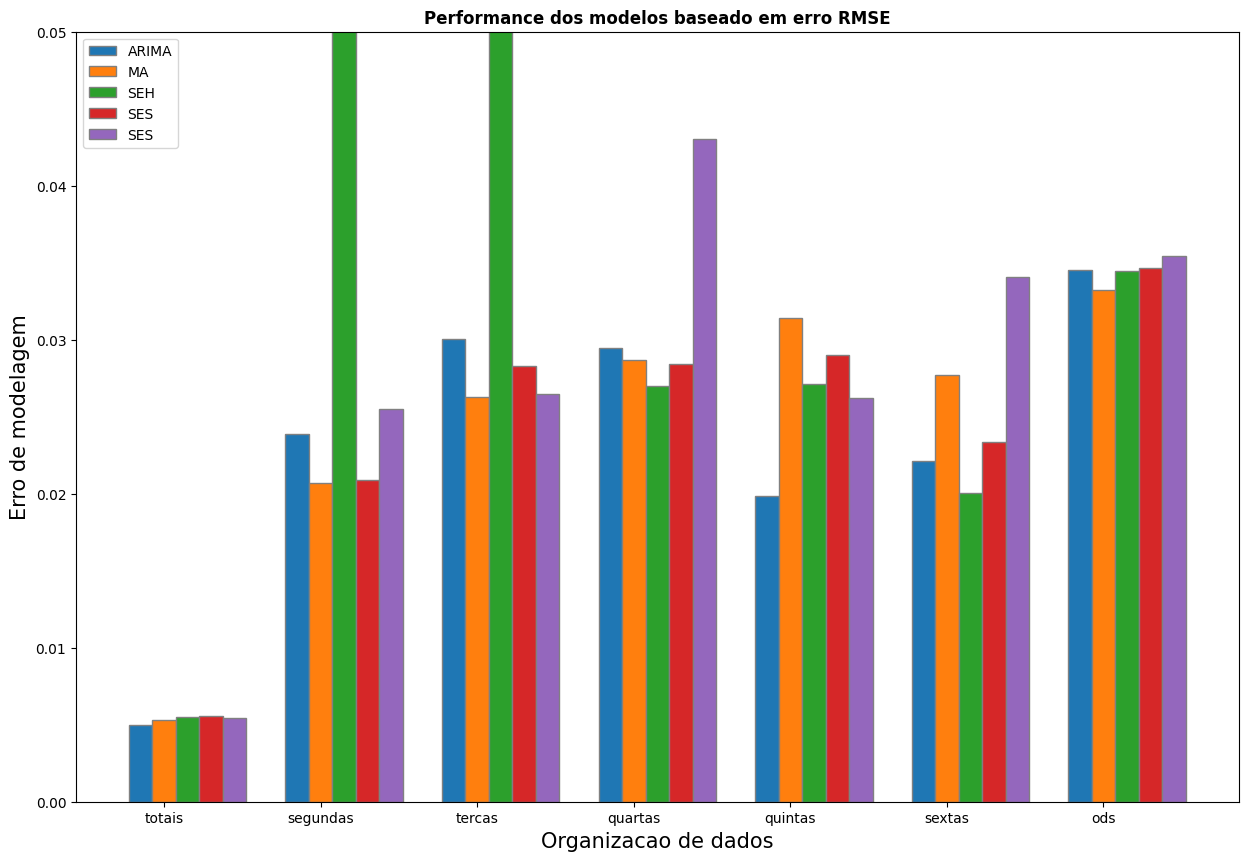

In [71]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(15,10))

# set height of bar
ARIMA 	= erros.loc[erros['error_type'] == 'RMSE','ARIMA' ].values
MA 		= erros.loc[erros['error_type'] == 'RMSE','MA'    ].values
SEH 	= erros.loc[erros['error_type'] == 'RMSE','SEH'   ].values
SES 	= erros.loc[erros['error_type'] == 'RMSE','SES'   ].values
HW 		= erros.loc[erros['error_type'] == 'RMSE','HW'    ].values

# Set position of bar on X axis
br1 = np.arange(len(ARIMA))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, ARIMA, width = barWidth,edgecolor ='grey', label ='ARIMA')
plt.bar(br2, MA, width = barWidth,edgecolor ='grey', label ='MA')
plt.bar(br3, SEH, width = barWidth,	edgecolor ='grey', label ='SEH')
plt.bar(br4, SES, width = barWidth,edgecolor ='grey', label ='SES')
plt.bar(br5, HW, width = barWidth,edgecolor ='grey', label ='SES')

# Adding Xticks
plt.xlabel('Organizacao de dados', fontsize = 15)
plt.ylabel('Erro de modelagem', fontsize = 15)

plt.title("Performance dos modelos baseado em erro RMSE", fontweight ='bold')
# ax.set_xlabel("Organizacao de dados")
# ax.set_ylabel("Erro de modelagem")

plt.xticks([r + barWidth for r in range(len(ARIMA))], erros.loc[erros['error_type'] == 'RMSE', 'type'].values)
plt.ylim([0, 0.05])

plt.legend(loc= 'upper left')
plt.show()


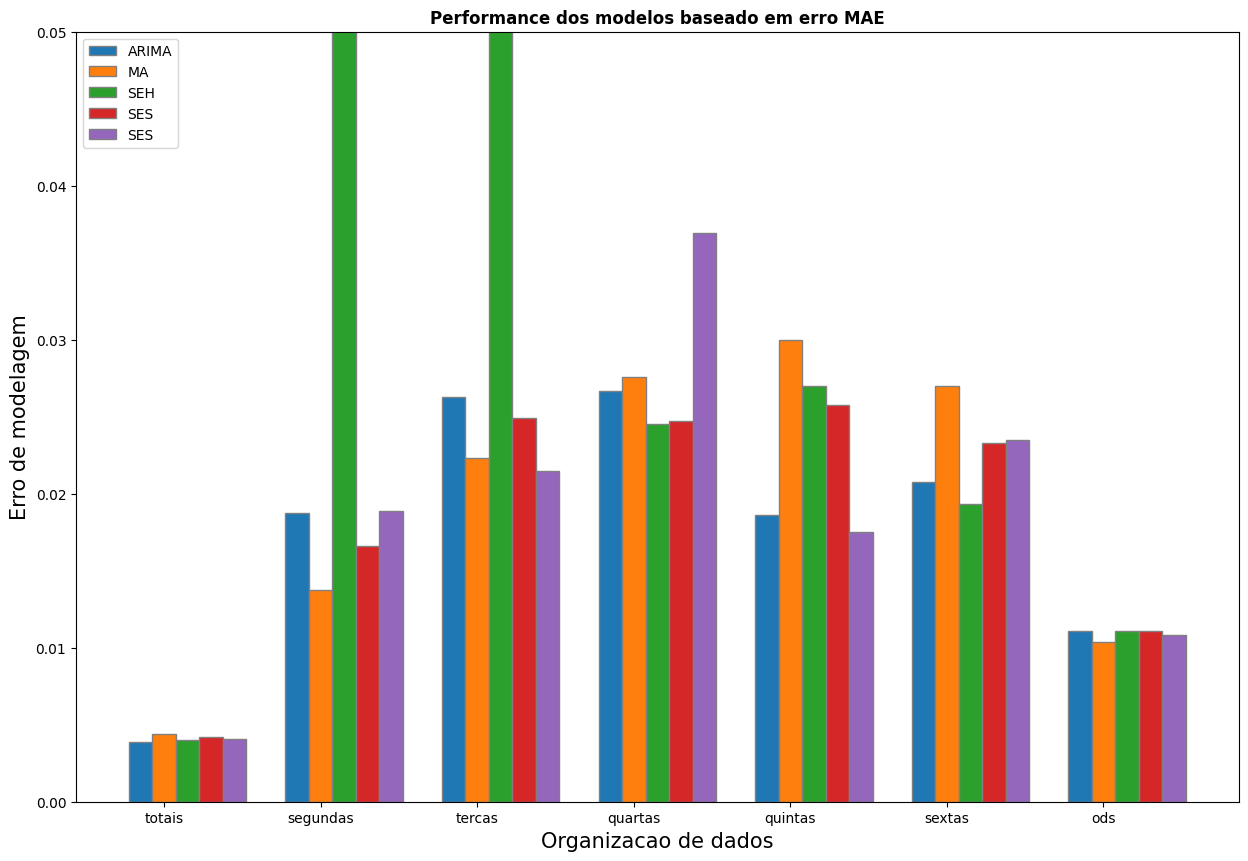

In [72]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(15,10))

# set height of bar
ARIMA 	= erros.loc[erros['error_type'] == 'MAE','ARIMA' ].values
MA 		= erros.loc[erros['error_type'] == 'MAE','MA'    ].values
SEH 	= erros.loc[erros['error_type'] == 'MAE','SEH'   ].values
SES 	= erros.loc[erros['error_type'] == 'MAE','SES'   ].values
HW 		= erros.loc[erros['error_type'] == 'MAE','HW'    ].values

# Set position of bar on X axis
br1 = np.arange(len(ARIMA))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, ARIMA, width = barWidth,edgecolor ='grey', label ='ARIMA')
plt.bar(br2, MA, width = barWidth,edgecolor ='grey', label ='MA')
plt.bar(br3, SEH, width = barWidth,	edgecolor ='grey', label ='SEH')
plt.bar(br4, SES, width = barWidth,edgecolor ='grey', label ='SES')
plt.bar(br5, HW, width = barWidth,edgecolor ='grey', label ='SES')

# Adding Xticks
plt.xlabel('Organizacao de dados', fontsize = 15)
plt.ylabel('Erro de modelagem', fontsize = 15)

plt.title("Performance dos modelos baseado em erro MAE", fontweight ='bold')
# ax.set_xlabel("Organizacao de dados")
# ax.set_ylabel("Erro de modelagem")

plt.xticks([r + barWidth for r in range(len(ARIMA))], erros.loc[erros['error_type'] == 'MAE', 'type'].values)
plt.ylim([0, 0.05])

plt.legend(loc= 'upper left')
plt.show()
